# Final Assignment: Massachusetts Public Schools Educational Attainment
CASA0006: Data Science for Spatial Systems

Student Number: 22236630

Word count: 1997

# Introduction

This study investigates educational attainment in Massachusetts Public Schools using data from 2017. It employs supervised and unsupervised machine learning techniques to determine the optimal model for predicting academic success, and conducts a baseline linear regression for interpretability. This project develops a function that utilises pipelines for preprocessing, dimensionality reduction, and iterates through machine learning regressors while tuning their hyperparameters. The data comes from several Massachusetts Department of Elementary and Secondary Education datasets collated independently and published online.

**Research Questions:**

    RQ1: What is the relationship between key features and achievement?
    RQ2: What models best predict educational achievement in Massachusetts public schools?

**Literature Review**

Extensive interdisciplinary literature draws correlations between social outcomes, education policy and academic attainment in America. Anthropological literature cites historically discriminatory education policies as the impetus for academic underperforming at schools with high numbers of socio-economic disadvantaged students (Asher, 2007; Crosnoe, 2009; Viesca, 2013). Other studies mobilise machine learning (ML) in tracing relationships between these factors, such as Educational Data Mining (EDM), an application of data mining techniques to analyse educational data (Ahmed and Elaraby, 2014; Burgos et al., 2018; Witten and Frank, 2002). Shete et al (2022) propose a unique ML algorithm to estimate student outcomes in degree programs, addressing challenges in student histories, course choices, and growth predictions. The technique uses a bi-layered design and data-driven strategy, outperforming benchmark methods in simulations with undergraduate student data (Shete et al., 2022, 1949). They define academic success in terms of students' ability to graduate on time and achieve satisfactory Grade Point Averages. Harvey and Kumar (2019) apply similar methods to model success at the elementary through high school level, using standardised testing data and three classifiers - linear regression, decision tree, and Naive Bayes techniques - for developing predictive models (Harvey and Kumar, 2019, p. 3004). Their study showed strong correlations between socioeconomic factors and SAT scores in Massachusetts and a negative correlation between expenditure per pupil and average SAT maths scores (Harvey and Kumar, 2019, p. 3009).

**Hypotheses:**
    
    H1: Higher education funding has a positive relationship with success and minority demographic categories have a negative relationship with success.
    H2: Ensemble methods give the best results, explaining a majority of the variation in the data accurately.
  
    H0: There is no relationship between the features and educational attainment and no model significantly differs from a random model

**Data**

Test scores, graduation rates, and GPAs are useful but limited measures of educational attainment. To better understand performance, this study utilises two alternative metrics: the Accountability Percentile (AP) and the Cumulative Progress and Performance Index (PPI) published by the Massachusetts Department of Elementary and Secondary Education. The AP compares a school's overall performance to others and considers factors such as achievement, growth, progress of English learners, chronic absenteeism, and completion rates. The PPI is a number 0-100 that combines information on student growth, graduation rates, and proficiency gaps over four years with recent years weighted more heavily (Massachusetts Department of Elementary and Secondary Education, no date a; no date b). Both measures provide a more holistic view of success than test scores. 

# Methods

This project uses supervised and unsupervised learning, defining a function that implements a pipeline architecture for preprocessing data, conducting dimensionality reduction, and iterates through regressors and tuning model hyperparameters with 10-fold cross-validation to minimise data leakage. It then evaluates model performance.

## <u> Unsupervised <u>

Dimensionality reduction techniques reduce the number of features in a dataset, making feature-rich datasets more malleable. Linear DR techniques, such as principal component analysis (PCA), create new features as linear combinations of the original features. PCA is well-suited for regression problems because it retains key patterns while reducing noise. The principle components (PCs) explain the greatest variance in the data, and the first often captures the data’s key patterns. The features’ coefficients for each component describe its contribution to that component. Accordingly, PCA eases interpretation of feature importance, identification of patterns in data, increases computational efficiency, and minimises the risk of overfitting.

## <u> Supervised<u>

Supervised learning is vital for regression problems. This project first performs a baseline multiple linear regression for general insights and reference in interpreting advanced methods’ outcomes. The core function streamlines supervised learning, including ensemble methods like RandomForest and GradientBoosting that train several models simultaneously based on hyperparameters. Hyperparameters are adjustable inputs that influence a model's learning process. Limiting the hyperparameter space here reduces the risk of overfitting and augments computational performance. 
    
Subsequently, this project assesses the variance, bias, and loss of several complex models’ outputs to discern the optimal model (lowest loss difference on training and testing data).
    
Since this study uses two distinct measures, it executes these methods twice to determine which metric the data models better.

## <u>Core Function Logic: models_with_pca()<u>

As noted in the data exploration below, the significant number of null values compel the use of an imputer in preprocessing and a KNN imputer best preserves patterns in the dataset. Furthermore, a StandardScaler is employed as PCA requires standardisation and KNN is sensitive to variability in data. This scalar is more robust for features with different units, conveniently dealing with this dataset’s variety of data types (i.e., percentages and currency) and outliers.

It iterates over the main regressors (Linear Regression, Random Forest, CART, XGBoost, and GradientBoosting) and tunes their hyperparameters. The hyperparameters include: (1) selecting the optimal number of PCs, (2) number of trees, and (3) max-depth of  trees. 10-fold cross validation is used to ensure accuracy. Additionally, the TransformedTargetRegressor wrapped around the pipeline adjusts the target variable before fitting the regressors without impacting the predictor variable. It inverts the transformation applied to the target variable, improving interpretability, accuracy of performance evaluation (R2 and RMSE), and consistency between predictions and actual values. 

After executing each regressor, the function visualises the outputs to facilitate the ensuing analysis. The outpust are:

    1. GridSearchCV results for each model
    2. Principal components table
    3. Summary chart with key model results on the test and training data
    4. Bar chart illustrating the R2 and RMSE outputs from each model for easy visual comparison.


# Libraries

In [1]:
# Key libraries used for visualisation and conducting regression analyses and making pipelines
import numpy as np                  # for numerical operations
import pandas as pd                 # for data manipulation
import matplotlib.pyplot as plt     # for creating plots and charts
import os                           # for file and directory operations

import sklearn                      # for machine learning algorithms and utilities
from sklearn.model_selection import train_test_split, GridSearchCV   # for splitting data into train and test sets, and hyperparameter tuning
from sklearn.metrics import mean_squared_error, r2_score             # for evaluation metrics

# preprocessors for data transformation
from sklearn.preprocessing import StandardScaler   # for scaling numeric data
from sklearn.impute import SimpleImputer, KNNImputer              # for imputing missing values

# for combining transformers and estimators into a single pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# PCA
from sklearn.decomposition import PCA

# Regression models
from sklearn.linear_model import LinearRegression              # for linear regression models
from sklearn.tree import DecisionTreeRegressor                  # for decision tree-based regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor   # for ensemble-based regression models
from xgboost import XGBRegressor                                                 # for gradient boosting-based regression models

# Other tools and utilities
from sklearn.compose import TransformedTargetRegressor       # for transforming target variables
from matplotlib.ticker import FixedLocator                    # for adjusting tick locators on plots
import seaborn as sns                                         # for enhanced data visualisation
from statsmodels.stats.outliers_influence import variance_inflation_factor  # for detecting multicollinearity
from statsmodels.tools.tools import add_constant                             # for adding constant term to data
import statsmodels.api as sm                                                # for OLS regression
import scipy.stats as stats                                                  # for statistical analysis
from mlxtend.evaluate import bias_variance_decomp                           # To evaluate the bias, variance, and error

# mlxtend might need to be installed. If that is the case, run the commented code below.

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
# !pip install mlxtend==0.21.0

# Data Presentation

In [3]:
#The code below reads in the 2017 Massachusetts Public School data from a remote repository
#uncomment to download the data

# Download the Data from Github
url = 'https://raw.githubusercontent.com/mhm02468/DSSS-Data/main/MA_Public_Schools_2017.csv'
! wget $url

# Alternatively, the data can be saved manually as a file using the above url

In [4]:
df = pd.read_csv("MA_Public_Schools_2017.csv")

In [5]:
# Take a quick glance at the raw data
df.head(5)

,School Code,School Name,School Type,Function,Contact Name,Address 1,Address 2,Town,State,Zip,...,MCAS_10thGrade_English_Incl. in SGP(#),Accountability and Assistance Level,Accountability and Assistance Description,School Accountability Percentile (1-99),Progress and Performance Index (PPI) - All Students,Progress and Performance Index (PPI) - High Needs Students,District_Accountability and Assistance Level,District_Accountability and Assistance Description,District_Progress and Performance Index (PPI) - All Students,District_Progress and Performance Index (PPI) - High Needs Students
0,10505,Abington High,Public School,Principal,Teresa Sullivan-Cruz,201 Gliniewicz Way,NaN,Abington,MA,2351,...,111.0,Level 1,Meeting gap narrowing goals,42.0,76.0,75.0,Level 3,One or more schools in the district classified...,63.0,60.0
1,10003,Beaver Brook Elementary School,Public School,Principal,Catherine Zinni,1 Ralph Hamlin Lane,NaN,Abington,MA,2351,...,NaN,Level 3,Among lowest performing 20% of subgroups,34.0,69.0,73.0,Level 3,One or more schools in the district classified...,63.0,60.0
2,10002,Center Elementary School,Public School,Principal,Lora Monachino,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Insufficient data,NaN,NaN,NaN,NaN,Level 3,One or more schools in the district classified...,63.0,60.0
3,10405,Frolio Middle School,Public School,Principal,Matthew MacCurtain,201 Gliniewicz Way,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,40.0,63.0,64.0,Level 3,One or more schools in the district classified...,63.0,60.0
4,10015,Woodsdale Elementary School,Public School,Principal,Jonathan Hawes,128 Chestnut Street,NaN,Abington,MA,2351,...,NaN,Level 2,Not meeting gap narrowing goals,52.0,65.0,67.0,Level 3,One or more schools in the district classified...,63.0,60.0


In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 302 columns):
 #    Column                                                               Non-Null Count  Dtype  
---   ------                                                               --------------  -----  
 0    School Code                                                          1861 non-null   int64  
 1    School Name                                                          1861 non-null   object 
 2    School Type                                                          1861 non-null   object 
 3    Function                                                             1861 non-null   object 
 4    Contact Name                                                         1861 non-null   object 
 5    Address 1                                                            1861 non-null   object 
 6    Address 2                                                            30 non-null     object 
 

/tmp/ipykernel_15599/2612161665.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


Evidently, there are also many null values for columns pertaining to test scores.

## <u>Columns<u>
The code eliminates test score, school identifier, and redundant columns. It retains demographic percentage data instead of raw count data, as the former is already standardised. Further, this prevents multicollinearity as AP and PPI already factor in columns like graduate numbers and university percentages.

In [7]:
to_drop = [
         # Test Score Columns
           'AP_Test Takers','AP_Tests Taken','AP_One Test','AP_Two Tests','AP_Three Tests','AP_Four Tests','AP_Five or More Tests',
           'AP_Score=1','AP_Score=2','AP_Score=3', 'AP_Score=4', 'AP_Score=5', '% AP_Score 1-2', '% AP_Score 3-5', 'SAT_Tests Taken', 'K_Enrollment',
           '1_Enrollment', '2_Enrollment', '3_Enrollment', '4_Enrollment', '5_Enrollment','6_Enrollment', '7_Enrollment', '8_Enrollment',
           '9_Enrollment', '10_Enrollment', '11_Enrollment', '12_Enrollment', 'SP_Enrollment','Phone', 'Fax','State','Function', 'Contact Name',
           'Address 1', 'Address 2','Average SAT_Reading', 'Average SAT_Writing', 'Average SAT_Math', 'MCAS_3rdGrade_Math_P+A #',
           '% MCAS_3rdGrade_Math_P+A', 'MCAS_3rdGrade_Math_A #', '% MCAS_3rdGrade_Math_A', 'MCAS_3rdGrade_Math_P #', '% MCAS_3rdGrade_Math_P',
           'MCAS_3rdGrade_Math_NI #', '% MCAS_3rdGrade_Math_NI', 'MCAS_3rdGrade_Math_W/F #', '% MCAS_3rdGrade_Math_W/F', 'MCAS_3rdGrade_Math_Stud. Incl. #',
           'MCAS_3rdGrade_Math_CPI', 'MCAS_3rdGrade_Math_SGP', 'MCAS_3rdGrade_Math_Incl. in SGP(#)', 'MCAS_4thGrade_Math_P+A #',
           '% MCAS_4thGrade_Math_P+A', 'MCAS_4thGrade_Math_A #', '% MCAS_4thGrade_Math_A', 'MCAS_4thGrade_Math_P #', '% MCAS_4thGrade_Math_P',
           'MCAS_4thGrade_Math_NI #', '% MCAS_4thGrade_Math_NI', 'MCAS_4thGrade_Math_W/F #', '% MCAS_4thGrade_Math_W/F', 'MCAS_4thGrade_Math_Stud. Incl. #',
           'MCAS_4thGrade_Math_CPI', 'MCAS_4thGrade_Math_SGP', 'MCAS_4thGrade_Math_Incl. in SGP(#)', 'MCAS_5thGrade_Math_P+A #', '% MCAS_5thGrade_Math_P+A',
           'MCAS_5thGrade_Math_A #', '% MCAS_5thGrade_Math_A','MCAS_5thGrade_Math_P #','% MCAS_5thGrade_Math_P', 'MCAS_5thGrade_Math_NI #',
           '% MCAS_5thGrade_Math_NI', 'MCAS_5thGrade_Math_W/F #', '% MCAS_5thGrade_Math_W/F', 'MCAS_5thGrade_Math_Stud. Incl. #', 'MCAS_5thGrade_Math_CPI',
           'MCAS_5thGrade_Math_SGP', 'MCAS_5thGrade_Math_Incl. in SGP(#)', 'MCAS_6thGrade_Math_P+A #', '% MCAS_6thGrade_Math_P+A',
           'MCAS_6thGrade_Math_A #','% MCAS_6thGrade_Math_A', 'MCAS_6thGrade_Math_P #', '% MCAS_6thGrade_Math_P', 'MCAS_6thGrade_Math_NI #',
           '% MCAS_6thGrade_Math_NI', 'MCAS_6thGrade_Math_W/F #', '% MCAS_6thGrade_Math_W/F', 'MCAS_6thGrade_Math_Stud. Incl. #', 'MCAS_6thGrade_Math_CPI',
           'MCAS_6thGrade_Math_SGP', 'MCAS_6thGrade_Math_Incl. in SGP(#)', 'MCAS_7thGrade_Math_P+A #', '% MCAS_7thGrade_Math_P+A','MCAS_7thGrade_Math_A #',
           '% MCAS_7thGrade_Math_A', 'MCAS_7thGrade_Math_P #', '% MCAS_7thGrade_Math_P', 'MCAS_7thGrade_Math_NI #', '% MCAS_7thGrade_Math_NI',
           'MCAS_7thGrade_Math_W/F #', '% MCAS_7thGrade_Math_W/F', 'MCAS_7thGrade_Math_Stud. Incl. #', 'MCAS_7thGrade_Math_CPI', 'MCAS_7thGrade_Math_SGP',
           'MCAS_7thGrade_Math_Incl. in SGP(#)', 'MCAS_8thGrade_Math_P+A #', '% MCAS_8thGrade_Math_P+A', 'MCAS_8thGrade_Math_A #','% MCAS_8thGrade_Math_A',
           'MCAS_8thGrade_Math_P #', '% MCAS_8thGrade_Math_P', 'MCAS_8thGrade_Math_NI #', '% MCAS_8thGrade_Math_NI', 'MCAS_8thGrade_Math_W/F #',
           '% MCAS_8thGrade_Math_W/F', 'MCAS_8thGrade_Math_Stud. Incl. #', 'MCAS_8thGrade_Math_CPI', 'MCAS_8thGrade_Math_SGP','MCAS_8thGrade_Math_Incl. in SGP(#)',
           'MCAS_10thGrade_Math_P+A #','% MCAS_10thGrade_Math_P+A', 'MCAS_10thGrade_Math_A #', '% MCAS_10thGrade_Math_A', 'MCAS_10thGrade_Math_P #',
           '% MCAS_10thGrade_Math_P','MCAS_10thGrade_Math_NI #', '% MCAS_10thGrade_Math_NI', 'MCAS_10thGrade_Math_W/F #', '% MCAS_10thGrade_Math_W/F',
           'MCAS_10thGrade_Math_Stud. Incl. #', 'MCAS_10thGrade_Math_CPI', 'MCAS_10thGrade_Math_SGP', 'MCAS_10thGrade_Math_Incl. in SGP(#)',
           'MCAS_3rdGrade_English_P+A #', '% MCAS_3rdGrade_English_P+A', 'MCAS_3rdGrade_English_A #', '% MCAS_3rdGrade_English_A',
           'MCAS_3rdGrade_English_P #', '% MCAS_3rdGrade_English_P','MCAS_3rdGrade_English_NI #', '% MCAS_3rdGrade_English_NI', 'MCAS_3rdGrade_English_W/F #',
           '% MCAS_3rdGrade_English_W/F', 'MCAS_3rdGrade_English_Stud. Incl. #', 'MCAS_3rdGrade_English_CPI', 'MCAS_3rdGrade_English_SGP',
           'MCAS_3rdGrade_English_Incl. in SGP(#)', 'MCAS_4thGrade_English_P+A #','% MCAS_4thGrade_English_P+A', 'MCAS_4thGrade_English_A #',
           '% MCAS_4thGrade_English_A', 'MCAS_4thGrade_English_P #', '% MCAS_4thGrade_English_P', 'MCAS_4thGrade_English_NI #', '% MCAS_4thGrade_English_NI',
           'MCAS_4thGrade_English_W/F #', '% MCAS_4thGrade_English_W/F', 'MCAS_4thGrade_English_Stud. Incl. #', 'MCAS_4thGrade_English_CPI', 'MCAS_4thGrade_English_SGP',
           'MCAS_4thGrade_English_Incl. in SGP(#)', 'MCAS_5thGrade_English_P+A #','% MCAS_5thGrade_English_P+A', 'MCAS_5thGrade_English_A #', 
           '% MCAS_5thGrade_English_A', 'MCAS_5thGrade_English_P #','% MCAS_5thGrade_English_P', 'MCAS_5thGrade_English_NI #', '% MCAS_5thGrade_English_NI',
           '% MCAS_5thGrade_English_W/F', 'MCAS_5thGrade_English_Stud. Incl. #', 'MCAS_5thGrade_English_CPI', 'MCAS_5thGrade_English_SGP',
           'MCAS_5thGrade_English_Incl. in SGP(#)', 'MCAS_6thGrade_English_P+A #', '% MCAS_6thGrade_English_P+A', 'MCAS_6thGrade_English_A #',
           '% MCAS_6thGrade_English_A', 'MCAS_6thGrade_English_P #', '% MCAS_6thGrade_English_P', 'MCAS_6thGrade_English_NI #',
           '% MCAS_6thGrade_English_NI', 'MCAS_6thGrade_English_W/F #', '% MCAS_6thGrade_English_W/F','MCAS_6thGrade_English_Stud. Incl. #',
           'MCAS_6thGrade_English_CPI', 'MCAS_6thGrade_English_SGP', 'MCAS_6thGrade_English_Incl. in SGP(#)', 'MCAS_7thGrade_English_P+A #',
           '% MCAS_7thGrade_English_P+A', 'MCAS_7thGrade_English_A #','% MCAS_7thGrade_English_A', 'MCAS_7thGrade_English_P #',
           '% MCAS_7thGrade_English_P', 'MCAS_7thGrade_English_NI #', '% MCAS_7thGrade_English_NI', 'MCAS_7thGrade_English_W/F #',
           '% MCAS_7thGrade_English_W/F', 'MCAS_7thGrade_English_Stud. Incl. #', 'MCAS_7thGrade_English_CPI', 'MCAS_7thGrade_English_SGP',
           'MCAS_7thGrade_English_Incl. in SGP(#)', 'MCAS_8thGrade_English_P+A #', '% MCAS_8thGrade_English_P+A', 'MCAS_8thGrade_English_A #',
           '% MCAS_8thGrade_English_A', 'MCAS_8thGrade_English_P #', '% MCAS_8thGrade_English_P','MCAS_8thGrade_English_NI #',
           '% MCAS_8thGrade_English_NI','MCAS_8thGrade_English_W/F #', '% MCAS_8thGrade_English_W/F', 'MCAS_8thGrade_English_Stud. Incl. #',
           'MCAS_8thGrade_English_CPI', 'MCAS_8thGrade_English_SGP', 'MCAS_8thGrade_English_Incl. in SGP(#)', 'MCAS_10thGrade_English_P+A #',
           '% MCAS_10thGrade_English_P+A', 'MCAS_10thGrade_English_A #', 'MCAS_5thGrade_English_W/F #',
           '% MCAS_10thGrade_English_A', 'MCAS_10thGrade_English_P #', '% MCAS_10thGrade_English_P', 'MCAS_10thGrade_English_NI #', 
           '% MCAS_10thGrade_English_NI', 'MCAS_10thGrade_English_W/F #','% MCAS_10thGrade_English_W/F',
           'MCAS_10thGrade_English_Stud. Incl. #', 'MCAS_10thGrade_English_CPI', 'MCAS_10thGrade_English_SGP','MCAS_10thGrade_English_Incl. in SGP(#)',
          
          
          # These mirror the Y variables (Accountability Percentile and PPI); they remove district level PPIs and Accountability measurements
          # because this project is focused on individual schools.
           'High School Graduates (#)','% Still in School','% Non-Grad Completers','% GED', '% Dropped Out','% Permanently Excluded',
           '% Attending College', '% Private Two-Year', '% Private Four-Year', '% Public Two-Year', '% Public Four-Year',
           '% MA Community College', '% MA State University', '% UMass','Accountability and Assistance Level', 'Accountability and Assistance Description',
           'District_Accountability and Assistance Level', 'District_Progress and Performance Index (PPI) - All Students',
           'District_Progress and Performance Index (PPI) - High Needs Students','Progress and Performance Index (PPI) - High Needs Students',
           '# in Cohort','District_Accountability and Assistance Description', '% Graduated', 'Attending Coll./Univ. (#)',
    
          # Here is some demographic information that is repetitive. While these could be included in the predictor
          # variables, they are captured by other columns in the data. Importantly, for variables that have both raw counts and
          # percentages, the latter is kept because it will be more standardised by default.
            'First Language Not English', 'English Language Learner', 'Students With Disabilities', 'High Needs', 'Economically Disadvantaged', 'Number of Students',
            
          # The columns used to identify schools are being dropped because they're not being used to predict
           'School Code', 'School Name', 'School Type', 'Town', 'Zip', 'Grade', 'District Name', 'District Code']

In [8]:
df1 = df.drop(columns=to_drop)

In [9]:
df1.columns.tolist()

['PK_Enrollment',
 'TOTAL_Enrollment',
 '% First Language Not English',
 '% English Language Learner',
 '% Students With Disabilities',
 '% High Needs',
 '% Economically Disadvantaged',
 '% African American',
 '% Asian',
 '% Hispanic',
 '% White',
 '% Native American',
 '% Native Hawaiian, Pacific Islander',
 '% Multi-Race, Non-Hispanic',
 '% Males',
 '% Females',
 'Total # of Classes',
 'Average Class Size',
 'Salary Totals',
 'Average Salary',
 'FTE Count',
 'In-District Expenditures',
 'Total In-district FTEs',
 'Average In-District Expenditures per Pupil',
 'Total Expenditures',
 'Total Pupil FTEs',
 'Average Expenditures per Pupil',
 'School Accountability Percentile (1-99)',
 'Progress and Performance Index (PPI) - All Students']

In [10]:
# This produces a chart with details on each prictor variable
# Source: Massachusetts Department of Elementary and Secondary Education, no date a

pd.set_option('display.max_colwidth', None)
data = {
    'Feature': ['PK_Enrollment', 'TOTAL_Enrollment', '% First Language Not English', '% English Language Learner',
                '% Students With Disabilities', '% High Needs', '% Economically Disadvantaged', '% African American',
                '% Asian', '% Hispanic', '% White', '% Native American', '% Native Hawaiian, Pacific Islander',
                '% Multi-Race, Non-Hispanic', '% Males', '% Females', 'Total # of Classes', 'Average Class Size',
                'Salary Totals', 'Average Salary', 'FTE Count', 'In-District Expenditures', 'Total In-district FTEs',
                'Average In-District Expenditures per Pupil', 'Total Expenditures', 'Total Pupil FTEs',
                'Average Expenditures per Pupil'],
    'Details': ['Number of Pre-Kindergarten students enrolled', 'Total number of students enrolled',
                'Percentage of students whose first language is not English',
                'Percentage of students who are English Language Learners and are enrolled in supplemental classes',
                'Percentage of students with disabilities', 'Percentage of students classified as high needs',
                'Percentage of students who are economically disadvantaged. According to Department of Education, this refers to "Students who receive assistance though the Supplemental Nutrition Assistance Program (SNAP), Transitional Assistance for Families with Dependent Children (TAFDC), the Department of Children and Families’ (DCF) foster care program, or MassHealth." These are public assistance programmes in MA. (Massachusetts Department of Elementary and Secondary Education, no date a)',
                'Percentage of students who are African American', 'Percentage of students who are Asian',
                'Percentage of students who are Hispanic', 'Percentage of students who are White',
                'Percentage of students who are Native American',
                'Percentage of students who are Native Hawaiian or Pacific Islander',
                'Percentage of students who are multi-race, non-Hispanic', 'Percentage of students who are male',
                'Percentage of students who are female', 'Total number of classes offered',
                'Average size of classes in number of students per class', 'Total amount of salaries paid to staff in USD',
                'Average salary of staff in USD',
                "Number of 'full-time equivalent' teaching roles per school. Certain teaching jobs are part-time, and as a result, they are represented as decimals (i.e., 0.8)",
                'All of a district’s operating expenditures for specifically in-district programs in USD',
                'Total number of full-time equivalent staff in district',
                'Total in-district expenditures divided by in-district Pupil FTEs in USD',
                'All district operating expenditures for in-district programs and out-of-district placements in USD',
                'Total number of full-time equivalent students', 'Average expenditures per pupil in USD']}

df = pd.DataFrame(data)

# Apply left-align to the DataFrame
df_styled = df.style.set_properties(**{'text-align': 'left'})

# Display the styled DataFrame
df_styled

,Feature,Details
0,PK_Enrollment,Number of Pre-Kindergarten students enrolled
1,TOTAL_Enrollment,Total number of students enrolled
2,% First Language Not English,Percentage of students whose first language is not English
3,% English Language Learner,Percentage of students who are English Language Learners and are enrolled in supplemental classes
4,% Students With Disabilities,Percentage of students with disabilities
5,% High Needs,Percentage of students classified as high needs
6,% Economically Disadvantaged,"Percentage of students who are economically disadvantaged. According to Department of Education, this refers to ""Students who receive assistance though the Supplemental Nutrition Assistance Program (SNAP), Transitional Assistance for Families with Dependent Children (TAFDC), the Department of Children and Families’ (DCF) foster care program, or MassHealth."" These are public assistance programmes in MA. (Massachusetts Department of Elementary and Secondary Education, no date a)"
7,% African American,Percentage of students who are African American
8,% Asian,Percentage of students who are Asian
9,% Hispanic,Percentage of students who are Hispanic


In [11]:
# The columns below are all numeric; they will be standardised and used as the x-variables in the regressors
predict_cols =   ['PK_Enrollment', 'TOTAL_Enrollment', '% First Language Not English', '% English Language Learner', '% Students With Disabilities',
                 '% High Needs', '% Economically Disadvantaged', '% African American', '% Asian', '% Hispanic', '% White', '% Native American',
                 '% Native Hawaiian, Pacific Islander', '% Multi-Race, Non-Hispanic', '% Males', '% Females', 'Total # of Classes', 'Average Class Size',
                 'Salary Totals', 'Average Salary', 'FTE Count', 'In-District Expenditures', 'Total In-district FTEs',
                 'Average In-District Expenditures per Pupil', 'Total Expenditures', 'Total Pupil FTEs',
                 'Average Expenditures per Pupil']

### Predictor Columns Set-Up for Machine Learning Models

In [12]:
# In order to undertake the advanced machine learning methods below, the following transformations are necessary:

# Extract the features' values
features_val = df1[predict_cols].values
feature_names = df1[predict_cols].columns.tolist()

In [13]:
features_val = predict_cols

## Histograms

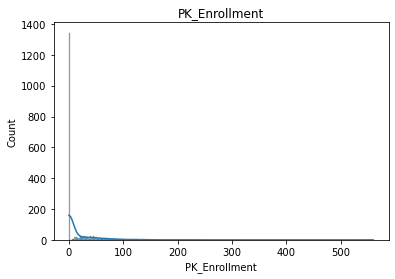

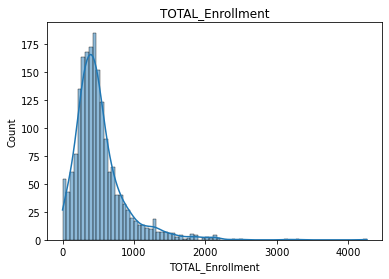

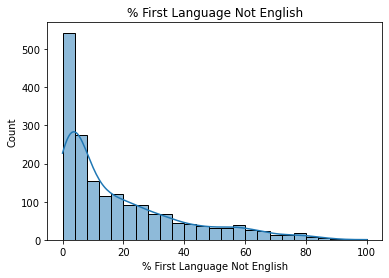

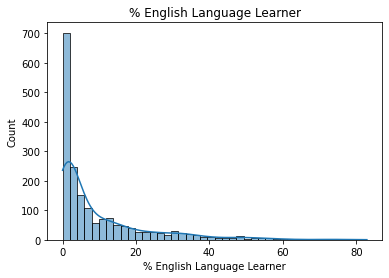

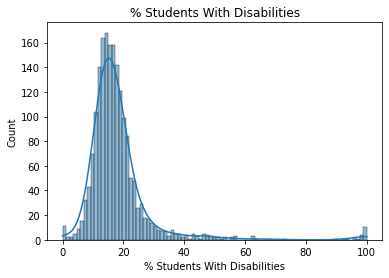

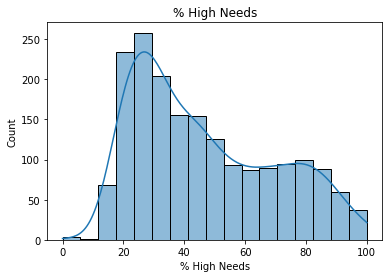

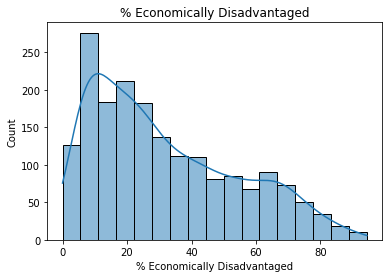

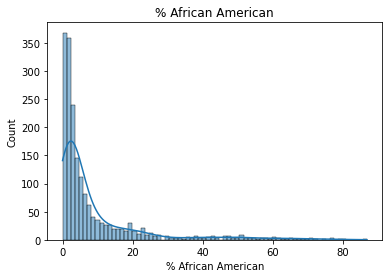

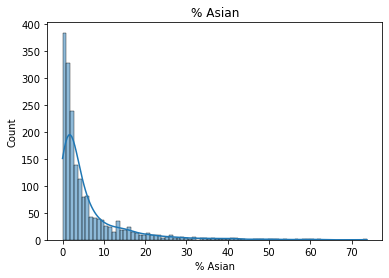

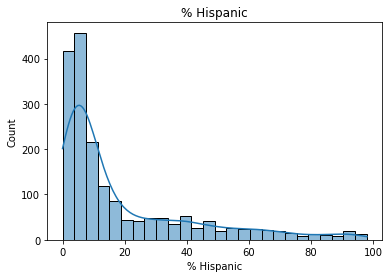

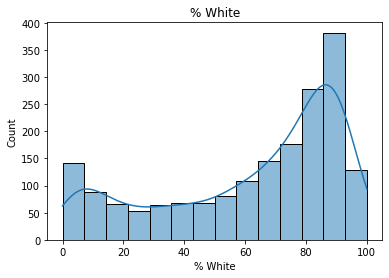

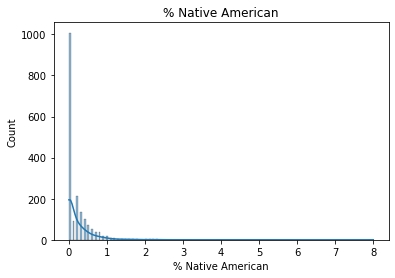

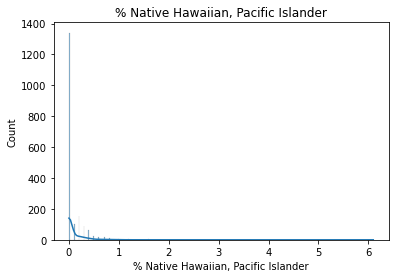

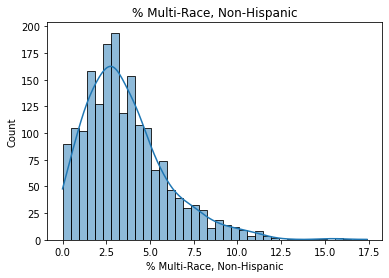

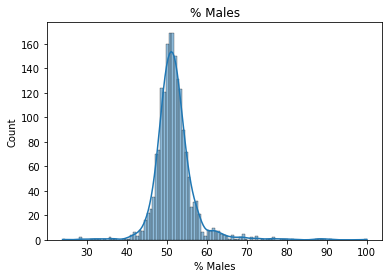

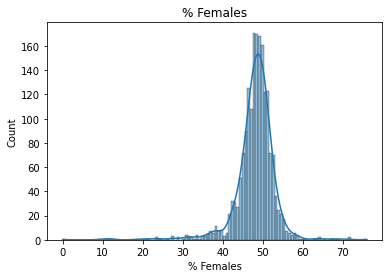

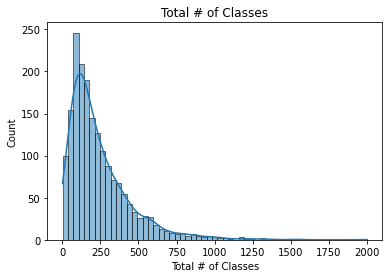

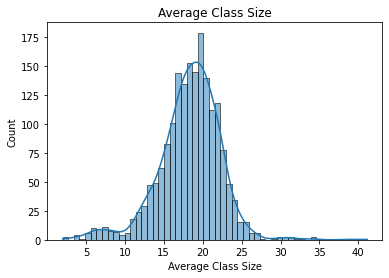

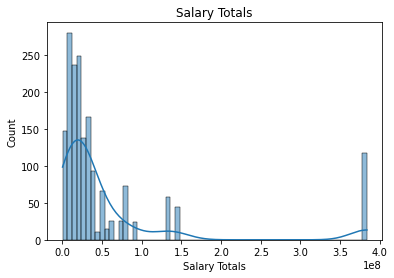

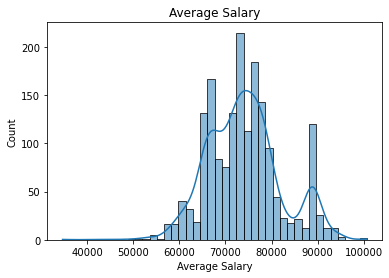

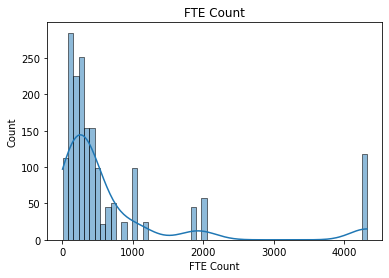

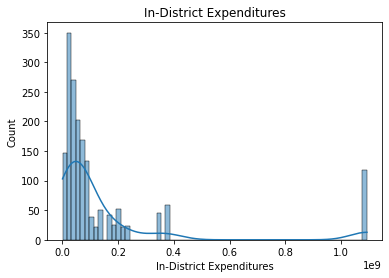

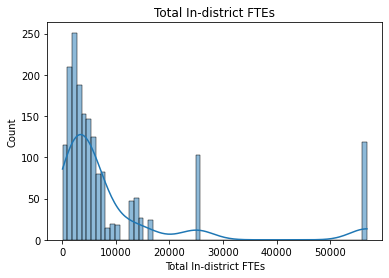

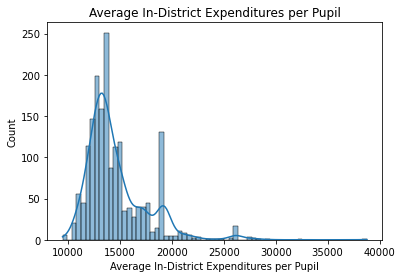

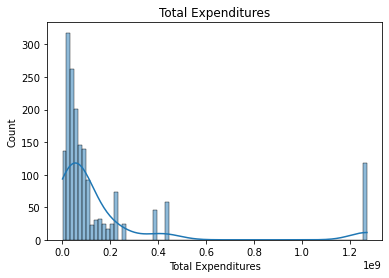

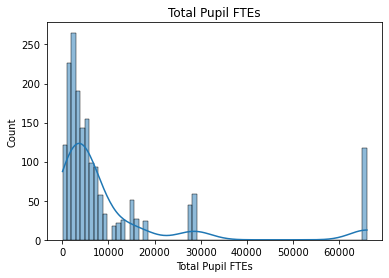

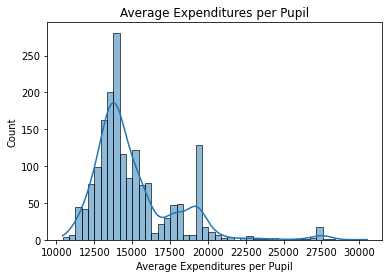

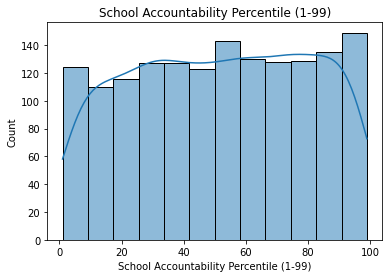

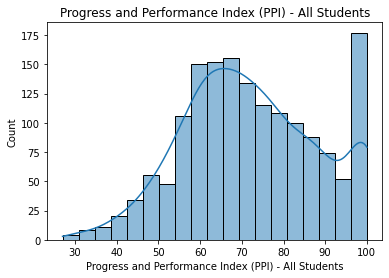

In [14]:
# Visualising the Data Distributions
columns = df1.columns

# Histograms
for col in columns:
    plt.figure()
    sns.histplot(df1[col], kde=True)
    plt.title(col)
    plt.show()

The histograms show positive skewing of race columns; gender distribution is more balanced with females having a higher median. Salary and expenditure fields vary widely. AP follows a near-uniform distribution and PPI a near-Gaussian one aside from PPI spiking close to 100.

## Summary Statistics

In [15]:
pivot_table = df1.describe().transpose()
pivot_table

,count,mean,std,min,25%,50%,75%,max
PK_Enrollment,1861.0,1.583772e+01,3.778451e+01,0.00,0.000000e+00,0.000000e+00,1.500000e+01,5.600000e+02
TOTAL_Enrollment,1861.0,5.124922e+02,3.666322e+02,0.00,2.940000e+02,4.360000e+02,6.180000e+02,4.264000e+03
% First Language Not English,1850.0,1.854827e+01,2.003104e+01,0.00,3.200000e+00,1.050000e+01,2.790000e+01,1.000000e+02
% English Language Learner,1850.0,9.548432e+00,1.316310e+01,0.00,9.000000e-01,3.600000e+00,1.320000e+01,8.290000e+01
% Students With Disabilities,1850.0,1.822368e+01,1.146250e+01,0.00,1.290000e+01,1.610000e+01,2.000000e+01,1.000000e+02
% High Needs,1850.0,4.661622e+01,2.296646e+01,0.00,2.740000e+01,4.120000e+01,6.497500e+01,1.000000e+02
% Economically Disadvantaged,1850.0,3.181665e+01,2.240991e+01,0.00,1.282500e+01,2.590000e+01,4.780000e+01,9.440000e+01
% African American,1850.0,8.699459e+00,1.369828e+01,0.00,1.400000e+00,3.300000e+00,8.700000e+00,8.690000e+01
% Asian,1850.0,6.050919e+00,8.763984e+00,0.00,1.200000e+00,2.600000e+00,6.900000e+00,7.370000e+01
% Hispanic,1850.0,1.899665e+01,2.257573e+01,0.00,4.000000e+00,8.200000e+00,2.730000e+01,9.800000e+01


Here, the columns % First Language Not English, % English Language Learner, % Students With Disabilities, % High Needs, and % Economically Disadvantaged exhibit large standard deviations, suggesting wide variation in these populations across schools. The standard deviations for sex are relatively low, implying an even distribution across schools. There is extensive variation in school sizes, staffing levels, and expenditures. On average, schools have 240 classes and 18 students per class. Staff salaries had the biggest range (\\$55,340 to \\$383,866,200). Schools' in-district and total expenditures differ significantly, and the average in-district expenditure per pupil is \\$14,573.

## Null Values

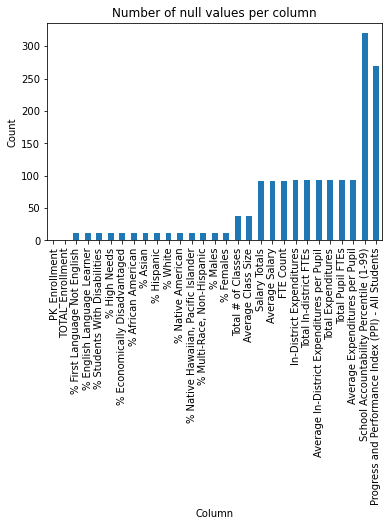

In [16]:
# Missing Data - in the y variables, there cannot be any null values

# Count the number of null values per column
null_counts = df1.isnull().sum()

# Create a bar chart of the null counts
null_counts.plot(kind='bar')
plt.title('Number of null values per column')
plt.xlabel('Column')
plt.ylabel('Count')
plt.show()

Numerous schools have not received AP and PPI values. 17.2% of schools lack the former, and 14.5% the latter. Future sections and code address this accordingly.

# Functions

In [17]:
def models_with_pca(X_train, X_test, y_train, y_test, features_val, pca_comp):
    
    '''    
    NOTES:

    This function takes in training and testing data (predictor variables and target variable) as well as a list of potential numbers of 
    components for PCA. It starts by preprocessing the data: first, it imputes missing values in the target variable using KNNImputer,
    then it preprocesses predictor variables using ColumnTransformer, applying the StandardScaler to numeric features.

    The function engages in most of the supervised and unsupervised learning methods used in this project. First, it fits regression
    models to the preprocessed data, tuning their hyperparameters using GridSearchCV, all in a for loop to ensure the uniform application
    of the methods used and for interpretability of the code. These hyperparameters are: the number of PCA components used in the 
    regressor, number of trees for ensemble methods, and max depth of trees. It employs the TransformedTargetRegressor to modify
    the target variable without affecting predictor variables. The regressors include Linear Regression, Random Forest, XGBoost, Decision
    Tree (CART), and Gradient Boosting. The performance of each regressor put through the pipeline is evaluated on the testing
    data, outputting the R2 and RMSE values for each regressor and the ideal hyperparameters as it runs the model.

    After running the regressors, it provides several outputs: a chart of the coefficients for each component in the PCA, a chart with
    the R2 and RMSE values for the training and testing values of each regressor to aid in model evaluation and the number of PCs used
    for each regressor. There is also a bar chart of the R2 and RMSE values to aid in interpretability. While the function can be
    applied to other datasets with similar types of questions, some adjustments to the hyperparameter space may be necessary due
    to the relatively small size determined for this current dataset.

    It is also important to note that this function is computationally expensive because it is comprehensive and streamlines several processes.

    Arguments:
    - X_train: the training data for the predictor variables used in the algorithm
    - X_test: the testing data for the predictor variables used in the algorithm
    - y_train: the training data for the y variables used in the algorithm
    - y_test: the testing data for the y variables used in the algorithm
    - features_val: A numpy array, the values in columns for the predictor variables in the regressions  
    - pca_comp: A list of integers, representing the number of potential components to use for PCA.

    Returns:
    - A list of fitted pipelines for each regressor after PCA and hyperparameter optimisation.
    - A list of PCA 'objects' to be used external to the function (i.e., for use in a scree plot)

    Credits:
    - Code for this function comes from Data Science for Spatial Systems Practicals 5 and 9 with additional general study of online forums.
    - Troubleshooting when writing the code came from consulting ChatGPT on how to address errors that arose when writing the code.
      If consistently encountering errors, chatGPT advised on potential changes to the code that might rectify the error or alternative
      approaches in the coding that could be taken. Accordingly, it was used as a learning aid.
      
    '''

# Preprocessing & the Pipeline

    # Add an imputer for the x and y values so that fitting the regressors can work and won't throw an error.
    # .ravel() flattens the data into a 1D array so it can be used to reshape the imputed y_train and y_test from 2D arrays into 1D arrays.
    # More details about the use of KNN can be found here: https://medium.com/@kyawsawhtoon/a-guide-to-knn-imputation-95e2dc496e
    KNNy_imputer = KNNImputer()
    y_train = KNNy_imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test = KNNy_imputer.transform(y_test.reshape(-1, 1)).ravel()
    
    # Change the features_val to integer indices so they can be accessed correctly
    features_indices = list(range(len(features_val)))

    # Setting-Up Transformer Pipeline
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()),
                                           ('imputer', KNNImputer())]) # You need to standardise your data before doing KNN because it is sensitive to scale
    preprocessor = ColumnTransformer(
         transformers=[('num', numeric_transformer, features_indices)])

    regressors = {'Linear': LinearRegression(),
                  'RF': RandomForestRegressor(random_state=123),
                  'XGB': XGBRegressor(random_state=123),
                  'CART': DecisionTreeRegressor(random_state=123),
                  'GBR': GradientBoostingRegressor(random_state=123)}
    
    # Create an empty list to append the results of the function later
    model_results = []
    
    # Create an empty list to append the PCA results so that they can be visualised later
    pca_objects = []

# Looping over Regressors & Hyperparameter Tuning

    # The below code comes from Data Science for Spatial Systems Practical 5 (1.5) where several regressors are looped over to
    # compare their performance. However, this incorperates the hyperparameter tuning.
    
    for name, regressor in regressors.items():
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('pca', PCA(random_state=123)),
                                   ('regressor', regressor)])
        
        # More information on this can be found here: https://machinelearningmastery.com/how-to-transform-target-variables-for-regression-with-scikit-learn/
        # The use of a trasformed target regressor came from ChatGPT after other transformers failed.
        transformed_regressor = TransformedTargetRegressor(regressor=pipeline)

        # Tune the hyperparameters and fit the models, using GridSearchCV with cross-validation of 5 folds
        # The hyperparmeter space is relatively small for this function because there are relatively few datapoints.
        # This can be changed for users who want to use this function with other data.
            
        if name == 'Linear':
            param_grid = {'regressor__pca__n_components': pca_comp}
        elif name == 'RF':
            param_grid = {'regressor__pca__n_components': pca_comp,
                          'regressor__regressor__n_estimators': [10, 50],
                          'regressor__regressor__max_depth': [2, 3, 5]}
        elif name == 'XGB':
            param_grid = {'regressor__pca__n_components': pca_comp,
                          'regressor__regressor__n_estimators': [10, 50],
                          'regressor__regressor__max_depth': [2, 3, 5]}
        elif name == 'CART':
            param_grid = {'regressor__pca__n_components': pca_comp,
                          'regressor__regressor__max_depth': [2, 3, 5]}
        elif name == 'GBR':
            param_grid = {'regressor__pca__n_components': pca_comp,
                          'regressor__regressor__n_estimators': [10, 50],
                          'regressor__regressor__max_depth': [2, 3, 5]}


        grid_search = GridSearchCV(transformed_regressor, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        y_train_pred = grid_search.predict(X_train)

# Model Evaluation and Presentation
# This section came from a combination of research using links included below and debugging with chatGPT
        
        # Since the goal of this project is both creating an accurate model *and* interpretability, it is essential to visualise the
        # principal components. Code based on Practical 9.
        
        # Get the fitted PCA object from the pipeline
        # Accessing steps of a scikit-learn pipeline:
        # https://stackoverflow.com/questions/28312534/how-to-access-steps-in-a-pipeline-after-fit
        pca = grid_search.best_estimator_.regressor_.named_steps['pca']

        print("---------------------------------------------")
        
        train_r2_score = r2_score(y_train, y_train_pred)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

        y_pred = grid_search.predict(X_test)
        best_n_components = grid_search.best_params_['regressor__pca__n_components']

        print(f"{name}:")
        print(f"Best number of components for {name}: {best_n_components}")
        print("Best Parameters: ", grid_search.best_params_)
        print(f"Testing Data R-squared score: {r2_score(y_test, y_pred)}")
        print(f"Testing Data RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

        print("---------------------------------------------")

        model_results.append({'Model': str(regressor).split('(')[0],
                      'Regressor': regressor,
                      'Best_n_components': best_n_components,
                      'R_squared_train': train_r2_score,
                      'R_squared_test': r2_score(y_test, y_pred),
                      'RMSE_train': train_rmse,
                      'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred))})
        
        # Append the PCA object to the list
        pca_objects.append(pca)
        
    # Create a DataFrame with the components and feature names
    components_df = pd.DataFrame(pca.components_, columns=features_val)
    components_df = components_df.transpose()

    # Display the DataFrame
    print("PCA components:")
    display(components_df)

    # Create a DataFrame with the model results and display it
    results_df = pd.DataFrame(model_results)
    display(results_df)

    # Plotting the results
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    models = results_df['Model']
    r2_train = results_df['R_squared_train']
    r2_test = results_df['R_squared_test']
    rmse_train = results_df['RMSE_train']
    rmse_test = results_df['RMSE_test']

    # Plot R-squared results
    ax[0].bar(models, r2_train, width=0.4, align='edge', label='Training')
    ax[0].bar(models, r2_test, width=-0.4, align='edge', label='Testing')
    ax[0].set_ylabel('R-squared')
    ax[0].set_title('Model Performance Comparison (R-squared)')
    ax[0].legend(loc='best')

    # Plot RMSE results
    ax[1].bar(models, rmse_train, width=0.4, align='edge', label='Training')
    ax[1].bar(models, rmse_test, width=-0.4, align='edge', label='Testing')
    ax[1].set_ylabel('RMSE')
    ax[1].set_title('Model Performance Comparison (RMSE)')
    ax[1].legend(loc='best')

    # Set x-axis labels rotation
    # the use of FixedLocator came from chatGPT after the visualisation malfunctioned otherwise.
    ax[0].set_xticklabels(models, rotation=45)
    ax[0].xaxis.set_major_locator(FixedLocator(range(len(models))))
    ax[1].set_xticklabels(models, rotation=45)
    ax[1].xaxis.set_major_locator(FixedLocator(range(len(models))))

    plt.show()
    
    # model_results is a list of dictionaries with the results of each model, pca_objects is a list with the PCA results
    return model_results, pca_objects

In [18]:
# Model Evaluation Function

def bias_variance_analysis(model_results, X_train, X_test, y_train, y_test, num_rounds=50, random_seed=123):
    '''
    NOTES:
    
    This function draws on the bias_variance_decomp() used in Data Science for Spatial Systems Practical 5 with the goal 
    of returning infomation on the bias, variance, and loss of the models fitted by the models_with_pca() function above. 
    For more information, see: https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/. It also aims to help
    assess how well the above models deal with the variance bias trade off. More on that can be found at this link:
    https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229.
    
    Arguments
    - model_results: the output from models_with_pca(). This is a list of dictionaries that store the outputs of the models. This includes the model name,
    the fit model itself, the R2 and RMSE values of the training and testing data.
    - X_train: the training data for the predictor variables used in the algorithm
    - X_test: the testing data for the predictor variables used in the algorithm
    - y_train: the training data for the y variables used in the algorithm
    - y_test: the testing data for the y variables used in the algorithm
    - num_rounds: all error testing requires several runs due to the inherent randomness of training/testing splitting, this specifies the number of runs
    
    Returns
    - a pandas dataframe of model evaluation metrics, including 'Expected Loss - Train', 'Bias - Train', 'Variance - Train',
    'Expected Loss - Test', 'Bias - Test', 'Variance - Test', and 'Diff Loss'
    
    Credit
    - Practical 5
    - Code troubleshooted with ChatGPT
    
    '''
    
    columns = ['Expected Loss - Train', 'Expected Loss - Test', 'Diff Loss', 'Bias - Train', 'Variance - Train', 'Bias - Test', 'Variance - Test']
    results = []

    for model_result in model_results:
        name = model_result['Model']
        regressor = model_result['Regressor']
        
        # take the output from the bias_variance_decomp()
        train_metrics = bias_variance_decomp(regressor, X_train, y_train, X_train, y_train, loss='mse', random_seed=random_seed, num_rounds=num_rounds)
        test_metrics = bias_variance_decomp(regressor, X_train, y_train, X_test, y_test, loss='mse', random_seed=random_seed, num_rounds=num_rounds)
        
        # difference in the loss shows the error and is thus essential for model evaluation
        diff_loss = train_metrics[0] - test_metrics[0]
        model_data = [name] + list(train_metrics) + list(test_metrics) + [diff_loss]
        results.append(model_data)

    df_results = pd.DataFrame(results, columns=['Model'] + columns)
    df_results.set_index('Model', inplace=True)

    return df_results

In [19]:
# calculating VIF
# This function comes from Data Science for Spatial Systems practical 6 which is amended from https://stackoverflow.com/a/51329496/4667568

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [20]:
def preprocess_data(X_train, X_test, y_train, y_test, features_val):
    '''
    NOTES:
    
    This function comes from the models_with_pca(), but is just the preprocessing step. It is used in this code to preprocess for the
    function bias_variance_analysis().
    
    Arguments
    - X_train: the training data for the predictor variables used in the algorithm
    - X_test: the testing data for the predictor variables used in the algorithm
    - y_train: the training data for the y variables used in the algorithm
    - y_test: the testing data for the y variables used in the algorithm
    - features_val: this refers to the values of the predictor variables
    
    Returns
    - A preprocessed version of the X and y training and testing datasets after applying the pipeline steps
    
    Credit
    - Code troubleshooted with ChatGPT
    
    '''
    
    # Create DataFrames from the input data so that we can work with each one individually and more easily manipulate them
    X_train_df = pd.DataFrame(X_train, columns=features_val)
    X_test_df = pd.DataFrame(X_test, columns=features_val)
    
    # Get the column indices of the features for the preprocessor so the preprocesser can access them
    features_indices = [X_train_df.columns.get_loc(feature) for feature in features_val]

    # Create a numeric_transformer to impute missing values and scale the data
    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler()), # you need to scale first so KNNimputer is accurate
                                           ('imputer', KNNImputer())])

    # Create a ColumnTransformer to preprocess the features using the numeric_transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, features_indices)
        ])

    # Preprocess the data using the ColumnTransformer, this is one of the outputs
    X_train_preprocessed = preprocessor.fit_transform(X_train_df)
    X_test_preprocessed = preprocessor.transform(X_test_df)

    # Create a KNNImputer to impute missing values in the y variable
    KNNy_imputer = KNNImputer()

    # Impute the missing values in the target variable
    y_train_imputed = KNNy_imputer.fit_transform(y_train.reshape(-1, 1)).ravel()
    y_test_imputed = KNNy_imputer.transform(y_test.reshape(-1, 1)).ravel()

    return X_train_preprocessed, X_test_preprocessed, y_train_imputed, y_test_imputed

# School Accountability Percentile

## <u>Baseline Linear Regression<u>
Below constitutes the baseline linear regression; it entails the same preprocessing.

In [21]:
# PREPROCESSING
# This steps needs to be done and is done in the same ways as in the models_with_pca() function, using the KNNimputer

# Drop the 'Progress and Performance Index (PPI) - All Students' column
df2 = df1.drop('Progress and Performance Index (PPI) - All Students', axis=1)

# Separate the independent and dependent variables
predict_cols = df2.columns[:-1]  # assuming the last column is the target column
target_col = df2.columns[-1]

X = df2[predict_cols]
y = df2[target_col]

# Impute missing values in the target variable
KNNy_imputer = KNNImputer() # the default number of neighbours is 5
y = KNNy_imputer.fit_transform(y.to_numpy().reshape(-1, 1)).ravel()

# Preprocess the data using the pipeline
preprocessing = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer())  # the default number of neighbors is 5
])

X_preprocessed = preprocessing.fit_transform(X)

In [22]:
# VIF

# Remove variables with high VIF
X_vif_removed = drop_column_using_vif_(pd.DataFrame(X_preprocessed, columns=predict_cols))

# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_vif_removed, y)

print('---------------------------')

# Calculate and print the mean squared error and R2 score
y_pred = lr_model.predict(X_vif_removed)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('The results of Linear Regression Following VIF')
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Max VIF: 172347.7372120053
Dropping: % White
Max VIF: 46548.346936269256
Dropping: Total Expenditures
Max VIF: 4393.4669312565175
Dropping: % Females
Max VIF: 4142.211736080556
Dropping: Total Pupil FTEs
Max VIF: 1647.722084830614
Dropping: Salary Totals
Max VIF: 1208.4353987890156
Dropping: FTE Count
Max VIF: 169.75915265681064
Dropping: Total In-district FTEs
Max VIF: 41.97719484965371
Dropping: % High Needs
Max VIF: 22.66966046794926
Dropping: Average Expenditures per Pupil
Max VIF: 8.000198407939747
Dropping: % First Language Not English
Max VIF: 5.237561314037303
Dropping: TOTAL_Enrollment
Max VIF: 4.623307617197157
---------------------------
The results of Linear Regression Following VIF
Mean squared error: 302.1286105783409
R2 score: 0.5432109502779079


In [23]:
# CREATE A REGRESSION TABLE TO DISPLAY THE RESULTS

# Create a regression table showing the coefficients, standard errors, t-values, and p-values.
# Coefficient extration idea from: https://stackoverflow.com/questions/68579159/adding-a-constant-in-multiple-linear-regression-using-statsmodels
X_vif_removed_sm = sm.add_constant(X_vif_removed)
lr_model_sm = sm.OLS(y, X_vif_removed_sm).fit()

#extract the key details from the regression to be use in the regression table
coef_names = ['const'] + list(X_vif_removed.columns)
coef_vals = [lr_model_sm.params[0]] + lr_model_sm.params[1:].tolist()
stderr_vals = [lr_model_sm.bse[0]] + lr_model_sm.bse[1:].tolist()
t_vals = [lr_model_sm.tvalues[0]] + lr_model_sm.tvalues[1:].tolist()
p_vals = [lr_model_sm.pvalues[0]] + lr_model_sm.pvalues[1:].tolist()

# Create the regression table as a pandas df
reg_table = pd.DataFrame({
    'Variable': coef_names,
    'Coefficient': coef_vals,
    'Std. Error': stderr_vals,
    't-value': t_vals,
    'p-value': p_vals
})

# Filter the table to show only statistically significant variables
significant_vars = reg_table[reg_table['p-value'] < 0.05]

# Sort the significant variables in ascending order
significant_vars = significant_vars.sort_values('p-value', ascending=True)

print('Variables of Regression post-VIF with p-values under 0.05')
significant_vars

Variables of Regression post-VIF with p-values under 0.05


,Variable,Coefficient,Std. Error,t-value,p-value
0,const,51.713964,0.405503,127.530531,0.000000e+00
4,% Economically Disadvantaged,-19.076593,0.872022,-21.876265,1.656769e-94
6,% Asian,3.497338,0.456282,7.664854,2.875446e-14
12,Total # of Classes,-2.854236,0.438470,-6.509540,9.688965e-11
7,% Hispanic,4.754075,0.802171,5.926513,3.684226e-09
2,% English Language Learner,-3.807972,0.704823,-5.402731,7.415418e-08
14,Average Salary,2.843223,0.588913,4.827921,1.493402e-06
11,% Males,-1.316997,0.507636,-2.594374,9.551424e-03
13,Average Class Size,-1.024531,0.495937,-2.065851,3.898192e-02
3,% Students With Disabilities,1.161023,0.566466,2.049591,4.054552e-02


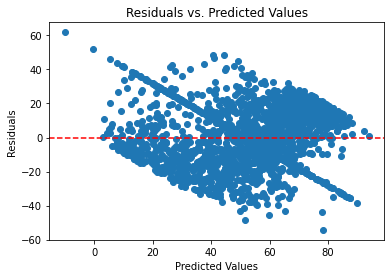

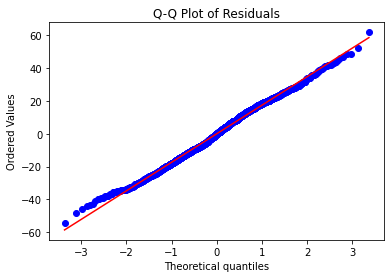

In [24]:
#PLOTTING - HETEROSCEDASTICITY

# Check for heteroscedasticity using the residuals plot
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Check for normality using a Q-Q plot of the residuals
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The above plots confirm the model satisfies the linear regression requirements and confirms these results:
1. “% economically disadvantaged” has a significant and strong negative relationship with the AP (-19.08 coefficient); a one-point increase relates to a 19-point decrease in the AP.
2. Statistically significant racial demographic variables (low p-value), such as Asian (coefficient 3.50) and Hispanic (coefficient 4.75), are positively associated with academic success. African American and other racial groups are not statistically significant, despite not being removed during VIF analysis. White was removed.
3. Higher salaries for educators correspond to an increase in academic attainment (Average Salary coefficient 2.84).
4. An increase in class sizes (-1.02 coefficient for average class size) is negatively related to success and so is the number of classes offered (coefficient -2.85).
5. "% male" corresponds to a 1.32 decrease in the AP.

## <u>Advanced Models<u>

In [25]:
# Drop the Progress and Performance Index (PPI) - All Students so that it is not included in the predictors
df2 = df1.drop('Progress and Performance Index (PPI) - All Students', axis=1)

# separate the independent and dependent variables
X = df2[predict_cols].values
y = df2['School Accountability Percentile (1-99)'].values

# split the data into training and testing sets
# An 80-20 training-testing split is used because the dataset is not huge. So, it's more useful to have more data trained on.
split_rand_state = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

---------------------------------------------
Linear:
Best number of components for Linear: 10
Best Parameters:  {'regressor__pca__n_components': 10}
Testing Data R-squared score: 0.5060929292491269
Testing Data RMSE: 18.05348432242377
---------------------------------------------
---------------------------------------------
RF:
Best number of components for RF: 10
Best Parameters:  {'regressor__pca__n_components': 10, 'regressor__regressor__max_depth': 5, 'regressor__regressor__n_estimators': 50}
Testing Data R-squared score: 0.5581107826970225
Testing Data RMSE: 17.076352593053773
---------------------------------------------
---------------------------------------------
XGB:
Best number of components for XGB: 10
Best Parameters:  {'regressor__pca__n_components': 10, 'regressor__regressor__max_depth': 2, 'regressor__regressor__n_estimators': 50}
Testing Data R-squared score: 0.5940884301264704
Testing Data RMSE: 16.36643637801895
---------------------------------------------
-------

,0,1,2,3,4,5,6,7,8,9
PK_Enrollment,0.041057,0.145642,0.052371,-0.048296,-0.001780,0.240587,-0.128662,0.523371,-0.660091,0.017006
TOTAL_Enrollment,-0.011518,-0.270115,-0.168975,0.515360,-0.258382,-0.060335,0.124118,0.041731,-0.123345,-0.122114
% First Language Not English,0.226766,0.017190,-0.265288,0.184472,0.183427,0.206309,-0.075084,0.082926,0.088108,0.159486
% English Language Learner,0.237731,0.006614,-0.231626,0.042185,0.165050,0.161992,-0.075711,0.053440,0.057708,0.171264
% Students With Disabilities,0.052656,0.406305,0.171955,0.123978,-0.104474,-0.068891,-0.016407,0.097191,-0.051939,-0.117437
% High Needs,0.235379,0.252001,-0.213347,0.051279,0.148835,-0.067819,0.066925,0.022503,-0.012546,-0.117212
% Economically Disadvantaged,0.215440,0.230946,-0.255292,0.007461,0.126821,-0.171569,0.117735,-0.023370,-0.020385,-0.184614
% African American,0.228939,-0.024428,0.084211,-0.027907,-0.050652,-0.049868,0.206637,-0.057910,-0.046797,-0.219664
% Asian,0.012760,-0.116897,0.078566,0.219309,0.096036,0.596900,-0.120188,0.064518,0.017800,0.070756
% Hispanic,0.213011,0.125184,-0.346981,0.101504,0.131875,-0.082613,-0.079023,0.016543,0.087476,0.079865


,Model,Regressor,Best_n_components,R_squared_train,R_squared_test,RMSE_train,RMSE_test
0,LinearRegression,LinearRegression(),10,0.480780,0.506093,18.535261,18.053484
1,RandomForestRegressor,RandomForestRegressor(random_state=123),10,0.643959,0.558111,15.348736,17.076353
2,XGBRegressor,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=123, ...)",10,0.661205,0.594088,14.972395,16.366436
3,DecisionTreeRegressor,DecisionTreeRegressor(random_state=123),6,0.568918,0.458681,16.888963,18.900137
4,GradientBoostingRegressor,GradientBoostingRegressor(random_state=123),10,0.828568,0.556928,10.650477,17.099187


/tmp/ipykernel_15599/1706717588.py:192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(models, rotation=45)
/tmp/ipykernel_15599/1706717588.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(models, rotation=45)


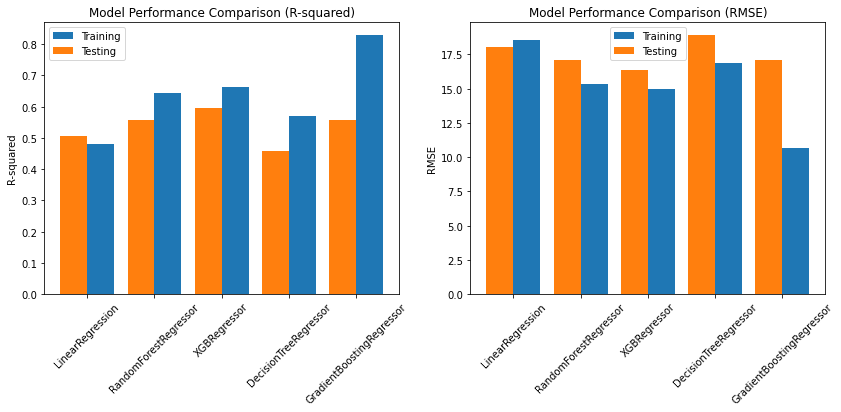

In [26]:
pca_comp = list(range(2, 11))
model_results, pca_objects = models_with_pca(X_train, X_test, y_train, y_test, features_val, pca_comp)

In [27]:
# Since models_with_pca() preprocessed the data within the function, it is essential to do it again
X_train_preprocessed, X_test_preprocessed, y_train_imputed, y_test_imputed = preprocess_data(X_train, X_test, y_train, y_test, features_val)

In [28]:
# This function takes the inputs of the preprocessed data and the model results from models_with_pca() to assess their performance
bias_variance_analysis(model_results, X_train_preprocessed, X_test_preprocessed, y_train_imputed, y_test_imputed, num_rounds=50, random_seed=123)

,Expected Loss - Train,Expected Loss - Test,Diff Loss,Bias - Train,Variance - Train,Bias - Test,Variance - Test
Model,,,,,,,
LinearRegression,302.437442,295.518539,6.918903,285.983540,279.638968,6.344572,16.453902
RandomForestRegressor,102.510194,64.505217,38.004978,240.396829,222.465241,17.931589,-137.886635
XGBRegressor,97.069096,32.477072,64.592024,265.039900,216.763037,48.276863,-167.970804
DecisionTreeRegressor,173.600086,33.753438,139.846648,477.511532,229.275021,248.236511,-303.911446
GradientBoostingRegressor,164.115905,145.877359,18.238547,235.339176,218.601115,16.738062,-71.223271


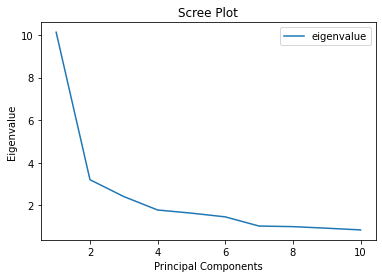

In [29]:
# Get the first PCA object from the pca_objects list; this comes from practical 9
pca = pca_objects[0]

# Create a DataFrame with the explained variance (eigenvalues) and principal components (PCs)
df = pd.DataFrame({'eigenvalue': pca.explained_variance_,
                   'PC': list(range(1, pca.n_components_ + 1))})

# Plot the explained variance for each principal component
df.plot.line(x='PC', y='eigenvalue')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.show()

## <u>Results<u>

Some models show overfitting to the training data. CART is the worst-performing model based on R2, RMSE, and Loss values. XGBRegressor (XGB) performs best, with the highest R2 (0.59), lowest RMSE (16.37) for testing data, and smaller gap between training and testing R2 results which indicates less overfitting. XGB's lower training and testing loss suggests better generalisation and handling of the bias-variance trade-off. Linear regression has better testing data performance (R2 of 0.51) than training data (0.48), with minimal overfitting due to a small difference in training and testing loss.
    
Based on the scree plot, the first two principal components, PC0 and PC1, capture most of the data's variance. PC0 is influenced by expenditures and full-time equivalent counts, while PC1 is influenced by enrollment and demographic factors. Ultimately, these models explain a majority of variation in the AP (over 50%).

# Progress and Performance Index (PPI)

## Baseline Linear Regression

In [30]:
# PREPROCESSING
# This steps needs to be done and is done in the same ways as in the models_with_pca() function, using the KNNimputer

# Drop the 'School Accountability Percentile (1-99)' column
df2 = df1.drop('School Accountability Percentile (1-99)', axis=1)

# Separate the independent and dependent variables
predict_cols = df2.columns[:-1]  # assuming the last column is the target column
target_col = df2.columns[-1]

X = df2[predict_cols]
y = df2[target_col]

# Impute missing values in the target variable
KNNy_imputer = KNNImputer() # the default number of neighbours is 5
y = KNNy_imputer.fit_transform(y.to_numpy().reshape(-1, 1)).ravel()

preprocessing = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', KNNImputer())  # the default number of neighbors is 5
])

X_preprocessed = preprocessing.fit_transform(X)

In [31]:
# VIF

# Remove variables with high VIF
X_vif_removed = drop_column_using_vif_(pd.DataFrame(X_preprocessed, columns=predict_cols))

# Fit the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_vif_removed, y)

print('---------------------------')

# Calculate and print the mean squared error and R2 score
y_pred = lr_model.predict(X_vif_removed)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('The results of Linear Regression Following VIF')
print(f'Mean squared error: {mse}')
print(f'R2 score: {r2}')

Max VIF: 172347.7372120053
Dropping: % White
Max VIF: 46548.346936269256
Dropping: Total Expenditures
Max VIF: 4393.4669312565175
Dropping: % Females
Max VIF: 4142.211736080556
Dropping: Total Pupil FTEs
Max VIF: 1647.722084830614
Dropping: Salary Totals
Max VIF: 1208.4353987890156
Dropping: FTE Count
Max VIF: 169.75915265681064
Dropping: Total In-district FTEs
Max VIF: 41.97719484965371
Dropping: % High Needs
Max VIF: 22.66966046794926
Dropping: Average Expenditures per Pupil
Max VIF: 8.000198407939747
Dropping: % First Language Not English
Max VIF: 5.237561314037303
Dropping: TOTAL_Enrollment
Max VIF: 4.623307617197157
---------------------------
The results of Linear Regression Following VIF
Mean squared error: 178.98874295868686
R2 score: 0.1967679391321202


In [32]:
# CREATE A REGRESSION TABLE TO DISPLAY THE RESULTS

# Create a regression table showing the coefficients, standard errors, t-values, and p-values.
# Coefficient extration idea from: https://stackoverflow.com/questions/68579159/adding-a-constant-in-multiple-linear-regression-using-statsmodels
X_vif_removed_sm = sm.add_constant(X_vif_removed)
lr_model_sm = sm.OLS(y, X_vif_removed_sm).fit()

#extract the key details from the regression to be use in the regression table
coef_names = ['const'] + list(X_vif_removed.columns)
coef_vals = [lr_model_sm.params[0]] + lr_model_sm.params[1:].tolist()
stderr_vals = [lr_model_sm.bse[0]] + lr_model_sm.bse[1:].tolist()
t_vals = [lr_model_sm.tvalues[0]] + lr_model_sm.tvalues[1:].tolist()
p_vals = [lr_model_sm.pvalues[0]] + lr_model_sm.pvalues[1:].tolist()

# Create the regression table and add the stars column
reg_table = pd.DataFrame({
    'Variable': coef_names,
    'Coefficient': coef_vals,
    'Std. Error': stderr_vals,
    't-value': t_vals,
    'p-value': p_vals})

# Filter the table to show only statistically significant variables
significant_vars = reg_table[reg_table['p-value'] < 0.05]

# Sort the significant variables in ascending order
significant_vars = significant_vars.sort_values('p-value', ascending=True)

print('Variables of Regression post-VIF with p-values under 0.05')
significant_vars

Variables of Regression post-VIF with p-values under 0.05


,Variable,Coefficient,Std. Error,t-value,p-value
0,const,72.309868,0.312112,231.679163,0.000000e+00
4,% Economically Disadvantaged,-6.461271,0.671189,-9.626610,1.951804e-21
6,% Asian,2.934314,0.351197,8.355182,1.267762e-16
7,% Hispanic,4.069664,0.617424,6.591358,5.672028e-11
13,Average Class Size,-2.080618,0.381718,-5.450663,5.693699e-08
14,Average Salary,2.128305,0.453281,4.695330,2.858240e-06
5,% African American,1.530225,0.481104,3.180654,1.493857e-03
2,% English Language Learner,-1.683905,0.542497,-3.103990,1.938297e-03
12,Total # of Classes,-0.873621,0.337487,-2.588610,9.712165e-03
15,In-District Expenditures,-1.139482,0.526917,-2.162545,3.070443e-02


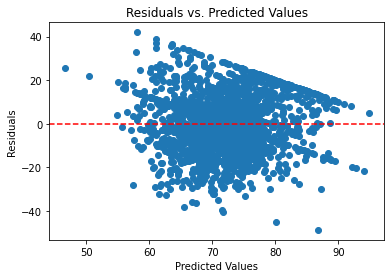

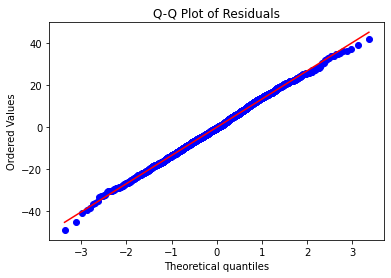

In [33]:
#PLOTTING - HETEROSCEDASTICITY

# Check for heteroscedasticity using the residuals plot
residuals = y - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Check for normality using a Q-Q plot of the residuals
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

This regression shows that the "% Economically Disadvantaged" variable has a strong negative relationship with success (coefficient of -6.46). White is again dropped during VIF analysis. Asian and Hispanic categories remain statistically significant, with positive relationships to success (coefficients of 2.93 and 4.06, respectively). Additionally, the African American category is included here with a positive relationship (coefficient of 1.53). For other demographics, "%students with disabilities" and "% English Language Learner" are negatively correlated with success (coefficients of -0.94 and -1.68, respectively). Like the AP, higher salaries for educators correspond to a positive increase in academic attainment (coefficient of 2.12). However, in-district expenditures show the opposite (coefficient of -1.14).

## <u>Advanced Models<u>

In [34]:
# Drop the School Accountability Percentile (1-99) so that it is not included in the predictors
df3 = df1.drop('School Accountability Percentile (1-99)', axis=1)

# separate the independent and dependent variables
X = df3[predict_cols].values
y = df3['Progress and Performance Index (PPI) - All Students'].values

# split the data into training and testing sets
split_rand_state = 123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

---------------------------------------------
Linear:
Best number of components for Linear: 10
Best Parameters:  {'regressor__pca__n_components': 10}
Testing Data R-squared score: 0.14006750110176003
Testing Data RMSE: 13.74032724898981
---------------------------------------------
---------------------------------------------
RF:
Best number of components for RF: 8
Best Parameters:  {'regressor__pca__n_components': 8, 'regressor__regressor__max_depth': 5, 'regressor__regressor__n_estimators': 50}
Testing Data R-squared score: 0.21616693323765723
Testing Data RMSE: 13.11827363050186
---------------------------------------------
---------------------------------------------
XGB:
Best number of components for XGB: 6
Best Parameters:  {'regressor__pca__n_components': 6, 'regressor__regressor__max_depth': 2, 'regressor__regressor__n_estimators': 50}
Testing Data R-squared score: 0.1864778804922863
Testing Data RMSE: 13.364403457554001
---------------------------------------------
---------

,0,1,2,3,4,5,6,7
PK_Enrollment,0.041057,0.145642,0.052371,-0.048296,-0.001780,0.240587,-0.128662,0.523371
TOTAL_Enrollment,-0.011518,-0.270115,-0.168975,0.515360,-0.258382,-0.060335,0.124118,0.041731
% First Language Not English,0.226766,0.017190,-0.265288,0.184472,0.183427,0.206309,-0.075084,0.082926
% English Language Learner,0.237731,0.006614,-0.231626,0.042185,0.165050,0.161992,-0.075711,0.053440
% Students With Disabilities,0.052656,0.406305,0.171955,0.123978,-0.104474,-0.068891,-0.016407,0.097191
% High Needs,0.235379,0.252001,-0.213347,0.051279,0.148835,-0.067819,0.066925,0.022503
% Economically Disadvantaged,0.215440,0.230946,-0.255292,0.007461,0.126821,-0.171569,0.117735,-0.023370
% African American,0.228939,-0.024428,0.084211,-0.027907,-0.050652,-0.049868,0.206637,-0.057910
% Asian,0.012760,-0.116897,0.078566,0.219309,0.096036,0.596900,-0.120188,0.064518
% Hispanic,0.213011,0.125184,-0.346981,0.101504,0.131875,-0.082613,-0.079023,0.016543


,Model,Regressor,Best_n_components,R_squared_train,R_squared_test,RMSE_train,RMSE_test
0,LinearRegression,LinearRegression(),10,0.157837,0.140068,13.724354,13.740327
1,RandomForestRegressor,RandomForestRegressor(random_state=123),8,0.381918,0.216167,11.757557,13.118274
2,XGBRegressor,"XGBRegressor(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n enable_categorical=False, eval_metric=None, feature_types=None,\n gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n interaction_constraints=None, learning_rate=None, max_bin=None,\n max_cat_threshold=None, max_cat_to_onehot=None,\n max_delta_step=None, max_depth=None, max_leaves=None,\n min_child_weight=None, missing=nan, monotone_constraints=None,\n n_estimators=100, n_jobs=None, num_parallel_tree=None,\n predictor=None, random_state=123, ...)",6,0.371299,0.186478,11.858125,13.364403
3,DecisionTreeRegressor,DecisionTreeRegressor(random_state=123),6,0.192462,0.080612,13.439260,14.207394
4,GradientBoostingRegressor,GradientBoostingRegressor(random_state=123),8,0.391409,0.210964,11.666936,13.161743


/tmp/ipykernel_15599/1706717588.py:192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(models, rotation=45)
/tmp/ipykernel_15599/1706717588.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(models, rotation=45)


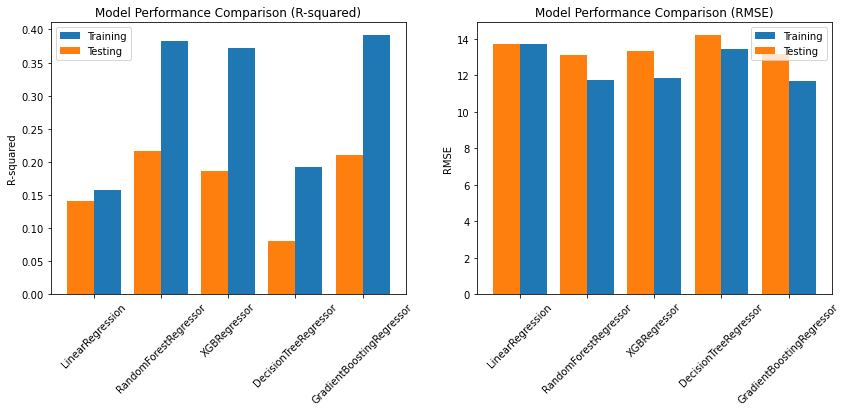

In [35]:
pca_comp = list(range(2, 11))
model_results2, pca_objects2 = models_with_pca(X_train, X_test, y_train, y_test, features_val, pca_comp)

In [36]:
X_train_preprocessed, X_test_preprocessed, y_train_imputed, y_test_imputed = preprocess_data(X_train, X_test, y_train, y_test, features_val)

In [37]:
bias_variance_analysis(model_results2, X_train_preprocessed, X_test_preprocessed, y_train_imputed, y_test_imputed, num_rounds=50, random_seed=123)

,Expected Loss - Train,Expected Loss - Test,Diff Loss,Bias - Train,Variance - Train,Bias - Test,Variance - Test
Model,,,,,,,
LinearRegression,175.120657,171.804884,3.315774,173.941157,170.781897,3.159260,1.179500
RandomForestRegressor,66.918860,42.569593,24.349266,165.706177,156.511892,9.194285,-98.787317
XGBRegressor,68.281323,23.260266,45.021057,187.993770,155.508310,32.485460,-119.712447
DecisionTreeRegressor,115.987971,22.046635,93.941335,323.702993,160.861693,162.841300,-207.715022
GradientBoostingRegressor,110.955236,99.358315,11.596921,165.413588,155.209771,10.203818,-54.458353


## <u>Results<u>
    
The results show that none of the models are particularly well-suited for the data, even with hyperparameter tuning. RandomForest performs best on test data, with the highest R2 (0.216) and a low RMSE (13.118). A significant gap between test and training R2 is common across all models except Linear Regression, suggesting overfitting. Most models display overfitting due to high differences between train and test losses. RandomForestRegressor provides the best balance between bias and variance, but overall performance is subpar. Together, this indicates insufficient data for discerning a pattern beyond randomness. The principal components in the scree plot are the same as those discussed earlier.

# Discussion and Conclusion

This study analysed 2017 Massachusetts public school data to investigate educational attainment. It used supervised and unsupervised ML to (1) characterise relationships between demographic categories, education funding, and success and (2) determine the best model for predicting success.

Comparing the two metrics’ utility for ML studies, the AP begets stronger results. The linear regression indicated that the presence of economically disadvantaged students has a strong negative relationship with academic success. Racial disparities, however, showed a positive relationship, suggesting that diversity in schools can bolster academic attainment. Moreover, higher salaries for educators exhibited a positive relationship. These findings support H1. 

Furthermore, ensemble methods like XGBRegressor and RandomForestRegressor demonstrated the best performance in predicting both success metrics, supporting H2. Although the models for PPI were lackluster, ensemble methods used with the AP explained a majority of the data’s variation. These findings allow us to reject H0.

In conclusion, addressing the needs of economically disadvantaged students, investing in teacher salaries, and optimising class sizes and resources are crucial for promoting educational success. Additionally, this study highlights the value of advanced modelling techniques and the need for more data to enhance predictive accuracy. Further research could expand on these findings with more data and other modelling techniques could be explored.

# Bibliography

Ahmed, A.B.E.D. and Elaraby, I.S. (2014) ‘Data Mining: A prediction for Student’s Performance Using Classification Method’, World Journal of Computer Application and Technology, 2(2), pp. 43–47. Available at: https://doi.org/10.13189/wjcat.2014.020203.

Albreiki, B., Zaki, N. and Alashwal, H. (2021) ‘A Systematic Literature Review of Student’ Performance Prediction Using Machine Learning Techniques’, Education Sciences, 11(9), p. 552. Available at: https://doi.org/10.3390/educsci11090552.

Asher, N. (2007) ‘Made in the (Multicultural) U.S.A.: Unpacking Tensions of Race, Culture, Gender, and Sexuality in Education’, Educational Researcher, 36(2), pp. 65–73. Available at: https://doi.org/10.3102/0013189X07299188.

Burgos, C. et al. (2018) ‘Data mining for modeling students’ performance: A tutoring action plan to prevent academic dropout’, Computers & Electrical Engineering, 66, pp. 541–556. Available at: https://doi.org/10.1016/j.compeleceng.2017.03.005.

Crosnoe, R. (2009) ‘Family–school connections and the transitions of low-income youths and english language learners from middle school to high school.’, Developmental Psychology, 45(4), pp. 1061–1076. Available at: https://doi.org/10.1037/a0016131.

Dalziel, N. and Massachusetts Department of Elementary and Secondary Education (2017) Massachusetts Public Schools Data. Available at: https://www.kaggle.com/datasets/ndalziel/massachusetts-public-schools-data (Accessed: 21 April 2023).

Harvey, J.L. and Kumar, S.A.P. (2019) ‘A Practical Model for Educators to Predict Student Performance in K-12 Education using Machine Learning’, in 2019 IEEE Symposium Series on Computational Intelligence (SSCI). 2019 IEEE Symposium Series on Computational Intelligence (SSCI), pp. 3004–3011. Available at: https://doi.org/10.1109/SSCI44817.2019.9003147.

Massachusetts Department of Elementary and Secondary Education (2017) Glossary of 2017 accountability reporting terms. Available at: https://www.mass.gov/doc/glossary-of-2016-reporting-terms-0/download.

Massachusetts Department of Elementary and Secondary Education (no date a) School and District Profiles: Accountability Data. Available at: https://profiles.doe.mass.edu/help/data.aspx?section=acct (Accessed: 21 April 2023).

Massachusetts Department of Elementary and Secondary Education (no date b) School and District Profiles: Finance. Available at: https://profiles.doe.mass.edu/help/data.aspx?section=finance (Accessed: 22 April 2023).

Mohamad, S.K. and Tasir, Z. (2013) ‘Educational Data Mining: A Review’, Procedia - Social and Behavioral Sciences, 97, pp. 320–324. Available at: https://doi.org/10.1016/j.sbspro.2013.10.240.

Shete, M. et al. (2022) ‘Tracking and Predicting Student Performance in Degree Programs using Machine Learning’, in 2022 5th International Conference on Contemporary Computing and Informatics (IC3I). 2022 5th International Conference on Contemporary Computing and Informatics (IC3I), pp. 1949–1954. Available at: https://doi.org/10.1109/IC3I56241.2022.10072692.

Slim, A. et al. (2014) ‘Employing Markov Networks on Curriculum Graphs to Predict Student Performance’, in 2014 13th International Conference on Machine Learning and Applications. 2014 13th International Conference on Machine Learning and Applications, pp. 415–418. Available at: https://doi.org/10.1109/ICMLA.2014.74.

Viesca, K.M. (2013) ‘Linguicism and Racism in Massachusetts Education Policy’, education policy analysis archives, 21(52).

Witten, I.H. and Frank, E. (2002) ‘Data mining: practical machine learning tools and techniques with Java implementations’, ACM Sigmod Record, 31(1), pp. 76–77. Available at: https://doi.org/10.1145/507338.507355.